# Requirements

# Imports

In [8]:

import matplotlib.pyplot as plt


# Train CNN with TensorFlow

# Train CNN with Keras

In [1]:

from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras import optimizers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


2024-02-13 18:35:35.507954: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

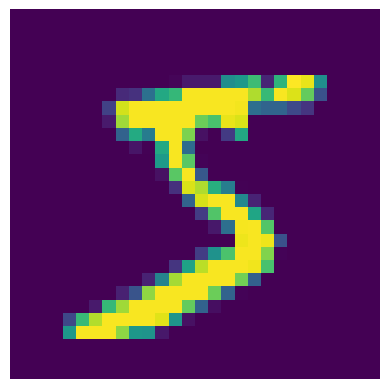

In [9]:

plt.imshow(train_images[0])
plt.axis('off')  # Turn off axis labels
plt.show()


In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
len(train_labels)

60000

In [11]:
len(train_images[0])

28

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
train_labels.shape

(60000,)

In [ ]:

# resape and scale
train_images = train_images.reshape((60000, 28 * 28))

# Since pixel values in typical images are in the range of 0 to 255 (for 8-bit images), dividing by 255 scales the pixel values to 
# the range [0, 1]. This is known as normalization.
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [14]:

# The function to_categorical is typically used when dealing with classification tasks
# It converts class labels into one-hot encoded vectors

# In classification tasks, especially with neural networks, the output layer usually has neurons corresponding to each class. 
# For example, if you have 10 classes, you would have 10 output neurons, each representing the probability of belonging to a particular class.

# One-hot encoding is a binary representation of categorical variables where each class is represented by a binary vector. 
# In this representation, only one bit is high (1) while all others are low (0). This helps the network to understand the categorical 
# nature of the output and interpret it correctly during training.
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [15]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Architecture examples

In [ ]:

### simple feedforward neural network with fully connected layers ###

# Feedforward neural networks are typically used for tasks where the input data is represented as a flat vector, such as tabular data or 
# pre-extracted features. In the context of image data, the approach of flattening the image into a vector and feeding it directly into a 
# feedforward neural network is often less effective compared to using convolutional neural networks (CNNs).

# network consists of sequence of 2 Dense layers, which are densely/fully connected
network = models.Sequential()

# (28 * 28,) corresponds to a 1D shape of length 784. This means the input data is expected to be a flat vector of length 784 
# (such as flattened images with dimensions 28x28).
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# softmax = array of 10 probability scores
network.add(layers.Dense(10, activation='softmax'))


In [ ]:

model = models.Sequential()

# This layer will return a tensor where the first dimension has been trans- formed to be 32.
# the default activation function is the linear activation function
# Here, input_shape=(784,) specifies the shape of the input data expected by the first layer of the model. 
# Similarly, (784,) corresponds to a 1D shape of length 784. This also means the input data is expected to be a flat vector of length 784.
model.add(layers.Dense(32, input_shape=(784,)))

# Thus this layer can only be connected to a downstream layer that expects 32- dimensional vectors as its input.
# # the default activation function is the linear activation function
model.add(layers.Dense(32))


In [ ]:

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

# And here’s the same model defined using the functional API:

input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)


In [ ]:

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,))) model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# l1
# regularizers.l1(0.001)

# simultaneous
# regularizers.l1_l2(l1=0.001, l2=0.001)


In [ ]:

### a feedforward neural network with fully connected layers, but with the addition of dropout regularization. ###

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:

# a dot product (dot) between the input tensor and a tensor named W
# an addition (+) between the resulting 2D ten- sor and a vector b
# a relu operation. relu(x) is max(x, 0)
output = relu(dot(W, input) + b)


## Compile

In [ ]:

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [ ]:

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])


## Fit

In [ ]:

network.fit(train_images, train_labels, epochs=5, batch_size=128)


In [ ]:

model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)


## Evaluate

In [ ]:

test_loss, test_acc = network.evaluate(test_images, test_labels)


In [ ]:

# CONVNETS

from keras import layers 
from keras import models

# a convolutional neural network (CNN), which is specifically designed to work with image data. It's more suitable for tasks where the 
# input data is structured in multiple dimensions, such as images represented as grids of pixels. 

model = models.Sequential()

# Conv2D
# a fundamental building block used for feature extraction from input images. 
# Convolution Operation: At its core, the Conv2D layer performs a convolution operation between the input image and a set of learnable filters 
# (also known as kernels or convolutional kernels). Each filter is a small matrix of weights.
# Feature Map: The convolution operation is applied by sliding each filter over the input image and computing the dot product between the 
# filter and the input patch at each position. This produces a feature map, which is a 2D representation of the activations of that filter 
# across the input image.
# Multiple Filters: Typically, a Conv2D layer has multiple filters, and each filter learns to detect a different pattern or feature in the 
# input image. For example, early filters might learn to detect edges or corners, while deeper filters might learn more complex patterns.
# Parameters: The weights of the filters in the Conv2D layer are the parameters that are learned during the training process. The goal of 
# training is to learn filters that can extract meaningful features from the input images for the task at hand (e.g., classification, 
# object detection).
# Padding: Optionally, the Conv2D layer can apply padding to the input image before performing the convolution operation. Padding adds extra 
# rows and columns of zeros around the input image, which helps preserve spatial dimensions and prevent information loss at the edges of 
# the image.
# Strides: Additionally, the Conv2D layer can use a stride parameter to specify the step size of the filter as it slides over the input image. 
# Larger stride values result in downsampling of the feature map, reducing its spatial dimensions.

# 32: This number represents the number of filters (also known as kernels or convolutional channels) in the convolutional layer. 
# Each filter is a small matrix that is applied to the input image to extract features. Having multiple filters allows the network to 
# learn different features at each location in the input image. In this case, there are 32 filters in the convolutional layer.
# (3, 3): This tuple represents the size of each filter in the convolutional layer. Each filter is a small matrix with dimensions specified 
# by this tuple. 
# In this case, each filter is a 3x3 matrix.

# Conv2D(output_depth, (window_height, window_width))

# input_shape=(image_height, image_width, image_channels)

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 

# MaxPooling2D
# a convolutional neural network (CNN) is to downsample the input representation, reducing its spatial dimensions. This helps in reducing the 
# computational complexity of the network, as well as providing a form of translation invariance.
# Here's how the MaxPooling2D layer works:
# It operates on each feature map independently.
# For each region of the input feature map specified by the pool size (in this case, (2, 2)), the maximum value within that region is retained.
# The output of the operation is a downsampled version of the input feature map, where the spatial dimensions are reduced by a factor 
# determined by the pool size.
# For example, if you have a (6, 6) input feature map and apply MaxPooling2D((2, 2)), you'll get a (3, 3) output feature map, as each (2, 2) 
# region is reduced to a single value (the maximum value in that region).
# The purpose of this downsampling operation is to:
# Reduce the number of parameters in the network, thus reducing computational complexity and memory requirements.
# Increase the receptive field of later layers, allowing them to capture more abstract features by aggregating information from larger 
# regions of the input.
# Provide a form of translation invariance, making the network more robust to small variations in the position of features within the input 
# images.

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# You can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). 
# The width and height dimensions tend to shrink as you go deeper in the network. 
# The number of channels is controlled by the first argument passed to the Conv2D layers (32 or 64).
model.summary()

# The next step is to feed the last output tensor (of shape (3, 3, 64)) into a densely connected classifier network like those you’re 
# already familiar with: a stack of Dense layers. These classifiers process vectors, which are 1D, whereas the current output is a 
# 3D tensor. First we have to flatten the 3D outputs to 1D, and then add a few Dense lay- ers on top.
# We’ll do 10-way classification, using a final layer with 10 outputs and a softmax activa- tion
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# the (3, 3, 64) outputs are flattened into vectors of shape (576,) before going through two Dense layers.

model.summary()


In [ ]:

# The fundamental difference between a densely connected layer and a convolution layer is this: Dense layers learn global patterns in their 
# input feature space (for exam- ple, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns 
# (see figure 5.1): in the case of images, patterns found in small 2D win- dows of the inputs. In the previous example, these windows were 
# all 3 × 3.

# This key characteristic gives convnets two interesting properties:
# The patterns they learn are translation invariant. After learning a certain pattern in the lower-right corner of a picture, a convnet 
# can recognize it anywhere: for example, in the upper-left corner. A densely connected network would have to learn the pattern anew 
# if it appeared at a new location. This makes convnets data efficient when processing images (because the visual world is fundamentally 
# translation invariant): they need fewer training samples to learn representations that have generalization power.
# They can learn spatial hierarchies of patterns (see figure 5.2). A first convolution layer will learn small local patterns such as edges, 
# a second convolution layer will learn larger patterns made of the features of the first layers, and so on. This allows convnets to efficiently 
# learn increasingly complex and abstract visual con- cepts (because the visual world is fundamentally spatially hierarchical).
